In [5]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_name = "../datasets/stead/merge.hdf5"
csv_file = "../datasets/stead/merge.csv"

# reading the csv file into a dataframe:
df = pd.read_csv(csv_file)
print(f'total events in csv file: {len(df)}')
# filterering the dataframe
df = df[(df.trace_category == 'earthquake_local') & (df.source_distance_km <= 20) & (df.source_magnitude > 3)]
print(f'total events selected: {len(df)}')

# making a list of trace names for the selected data
ev_list = df['trace_name'].to_list()

# retrieving selected waveforms from the hdf5 file: 
dtfl = h5py.File(file_name, 'r')
for c, evi in enumerate(ev_list):
    dataset = dtfl.get('data/'+str(evi)) 
    # waveforms, 3 channels: first row: E channel, second row: N channel, third row: Z channel 
    data = np.array(dataset)

    fig = plt.figure()
    ax = fig.add_subplot(311)         
    plt.plot(data[:,0], 'k')
    plt.rcParams["figure.figsize"] = (8, 5)
    legend_properties = {'weight':'bold'}    
    plt.tight_layout()
    ymin, ymax = ax.get_ylim()
    pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=2, label='P-arrival')
    sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=2, label='S-arrival')
    cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=2, label='Coda End')
    plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)        
    plt.ylabel('Amplitude counts', fontsize=12) 
    ax.set_xticklabels([])

    ax = fig.add_subplot(312)         
    plt.plot(data[:,1], 'k')
    plt.rcParams["figure.figsize"] = (8, 5)
    legend_properties = {'weight':'bold'}    
    plt.tight_layout()
    ymin, ymax = ax.get_ylim()
    pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=2, label='P-arrival')
    sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=2, label='S-arrival')
    cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=2, label='Coda End')
    plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)        
    plt.ylabel('Amplitude counts', fontsize=12) 
    ax.set_xticklabels([])

    ax = fig.add_subplot(313)         
    plt.plot(data[:,2], 'k')
    plt.rcParams["figure.figsize"] = (8,5)
    legend_properties = {'weight':'bold'}    
    plt.tight_layout()
    ymin, ymax = ax.get_ylim()
    pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=2, label='P-arrival')
    sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=2, label='S-arrival')
    cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=2, label='Coda End')
    plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)        
    plt.ylabel('Amplitude counts', fontsize=12) 
    ax.set_xticklabels([])
    plt.show() 

    for at in dataset.attrs:
        print(at, dataset.attrs[at])    

#     break
    inp = input("Press a key to plot the next waveform!")
    if inp == "r":
        continue             

In [1]:
%load_ext autoreload
%autoreload 1

%aimport train_stead
%aimport model.model
%aimport data


train_ds,test_ds = data.get_stead()
train_ds = train_ds
test_ds = test_ds

/home/jovyan/work/data.py:85: DtypeWarning: Columns (7,11,13,14,15,18,19,20,21,22,24,25,26,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  gen = stead_generator(hdf_file,csv_file,test_ratio,noise_ratio)


In [2]:
x,y = next(iter(train_ds))

In [3]:
import numpy as np
np.where(y == [0])

(array([ 0,  1,  2,  3,  7, 12, 14, 16, 18, 19, 20, 23, 24, 25, 27]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

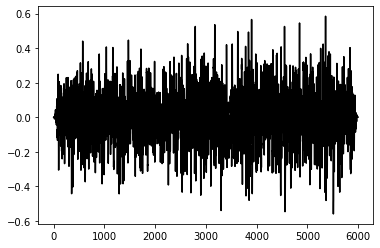

In [6]:
plt.plot(x[0][:,0], 'k')

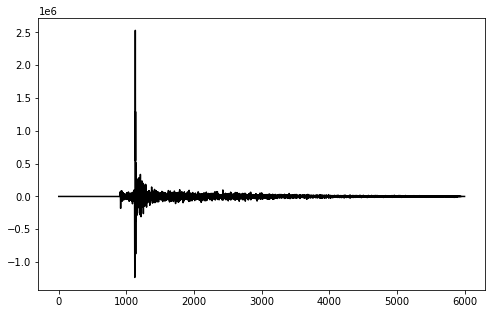

In [21]:
plt.plot(x[1][:,0], 'k')